# Домашняя работа №2
Панов А.А, Шестаков А.В. Майнор по анализу данных 2016

<hr\>
**Общая информация**

**Срок сдачи:** 12 марта 2016, 23:59 <br\>
**Штраф за опоздание:** -0.5 за каждый день

При отправлении ДЗ на почту указывайте фамилию в названии файла, а тему письма оформляйте в следующем виде:<br\>
** [minor-da-16] *{Фамилия}* *{Имя}* ДЗ*{Номер}* **<br\>


Сопровождайте ваш код изображеними, комментариями и выводами. <br\>
Иммейте ввиду, что на некоторые задачи нет единственного верного и полного ответа. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше.

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

## 1. Теория веротяностей. Распределения

В SciPy более 80 видов непрерывных и более 12 дискретных распределений, более 70 статистических функций

In [5]:
import scipy as sp
import numpy as np
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

%matplotlib inline

**Задача 1.** Сгенерируйте три распределения: гауссовское с мат. ожиданием 1 и дисперсией 4, хи-квадрат с $k = 3$ и дискртеное пуассоновское с $\lambda = 10$.<br/> 

При генерации используйте 500 точек. Посчитайте для каждого из них обчный набор статистик: среднее, минимум, максимум, дисперсию, кривизну и смещенность.

In [119]:
normal = np.random.normal(loc = 1.0, scale = 2.0, size = 500)
chisquared = np.random.chisquare(3, size = 500)
poisson = np.random.poisson(lam = 10.0, size = 500)

Посчитаем для них обычный набор статистик:

In [120]:
from scipy import stats
sp.stats.describe(normal)

DescribeResult(nobs=500, minmax=(-5.5728881518320614, 6.1918992810539102), mean=0.9022846572281733, variance=4.1055944045310993, skewness=-0.11566851898494418, kurtosis=0.04540324040668642)

In [121]:
sp.stats.describe(chisquared)

DescribeResult(nobs=500, minmax=(0.12638047531401919, 19.304355152620214), mean=3.105988714405794, variance=7.5679134316578898, skewness=1.7668963933171007, kurtosis=4.67444703807265)

In [122]:
sp.stats.describe(poisson)

DescribeResult(nobs=500, minmax=(2, 21), mean=10.087999999999999, variance=11.018292585170341, skewness=0.2778696248527263, kurtosis=-0.07246667789038197)

**Задача 2.** Найрисуйте функцию (cdf) и плотность (pdf) распределений. На графиках pdf отметьте среднее значение и медиану.

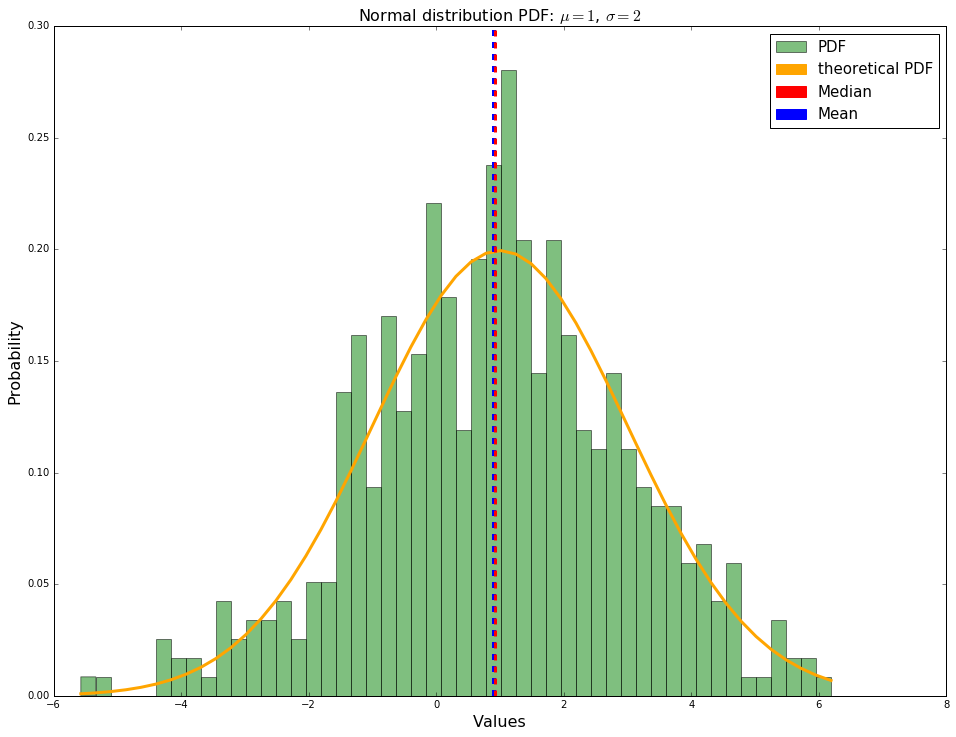

In [207]:
mu = 1
sigma = 2

num_bins = 50
# PDF
n, bins, patches = plt.hist(normal, num_bins, normed=1, facecolor='green', alpha=0.5)
y = mlab.normpdf(bins, mu, sigma) #теоретический график 
normal_median = np.median(normal)
plt.plot(bins, y, 'orange', linewidth = 3)
plt.axvline(normal.mean(), color='b', linestyle='dashed', linewidth=4) #среднее синего цвета
plt.axvline(np.median(normal), color='r', linestyle='dashed', linewidth=3) #медиана красного цвета
plt.xlabel('Values', fontsize = 16)
plt.ylabel('Probability', fontsize = 16)
plt.title(r'Normal distribution PDF: $\mu=1$, $\sigma=2$', fontsize = 16)

green_patch = mpatches.Patch(facecolor='green',alpha = 0.5, label='PDF')
orange_patch = mpatches.Patch(color='orange', label='theoretical PDF')
blue_patch = mpatches.Patch(color='b', label='Mean')
red_patch = mpatches.Patch(color='r', label='Median')
plt.legend(handles=[green_patch, orange_patch, red_patch, blue_patch], fontsize = 15)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 12
plt.show()

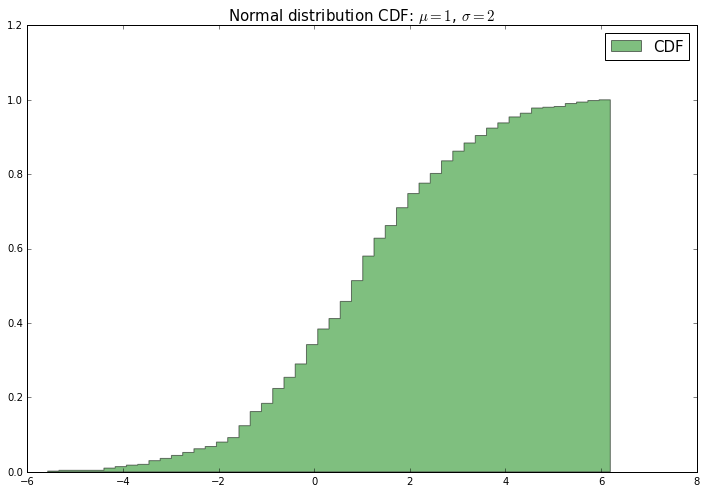

In [191]:
n, bins, patches = plt.hist(normal, 50, normed=1,
                            histtype='stepfilled', facecolor = 'green', alpha = 0.5, cumulative=True)
plt.title(r'Normal distribution CDF: $\mu=1$, $\sigma=2$', fontsize = 15)
green_patch2 = mpatches.Patch(facecolor='green',alpha = 0.5, label='CDF')
plt.legend(handles=[green_patch2], fontsize = 15)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
plt.show()

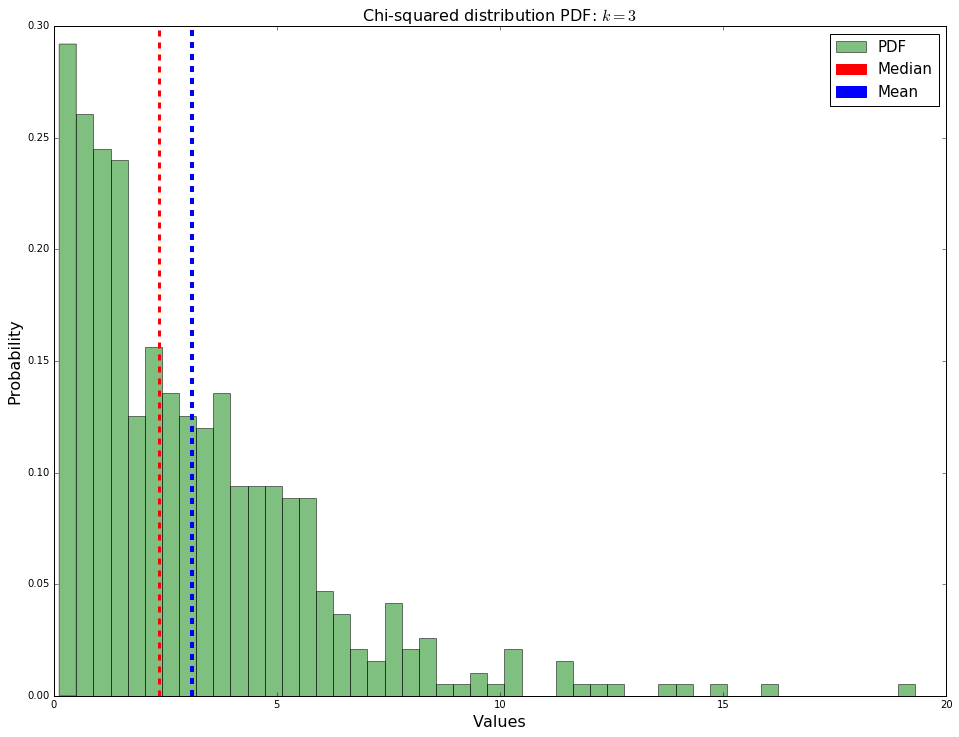

In [208]:
num_bins = 50
# PDF
n, bins, patches = plt.hist(chisquared, num_bins, normed=1, facecolor='green', alpha=0.5)

plt.axvline(chisquared.mean(), color='b', linestyle='dashed', linewidth=4) #среднее синего цвета
plt.axvline(np.median(chisquared), color='r', linestyle='dashed', linewidth=3) #медиана красного цвета
plt.xlabel('Values', fontsize = 16)
plt.ylabel('Probability', fontsize = 16)
plt.title(r'Chi-squared distribution PDF: $k=3$', fontsize = 16)

green_patch = mpatches.Patch(facecolor='green',alpha = 0.5, label='PDF')
blue_patch = mpatches.Patch(color='b', label='Mean')
red_patch = mpatches.Patch(color='r', label='Median')
plt.legend(handles=[green_patch, red_patch, blue_patch], fontsize = 15)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 24
fig_size[1] = 16
plt.show()

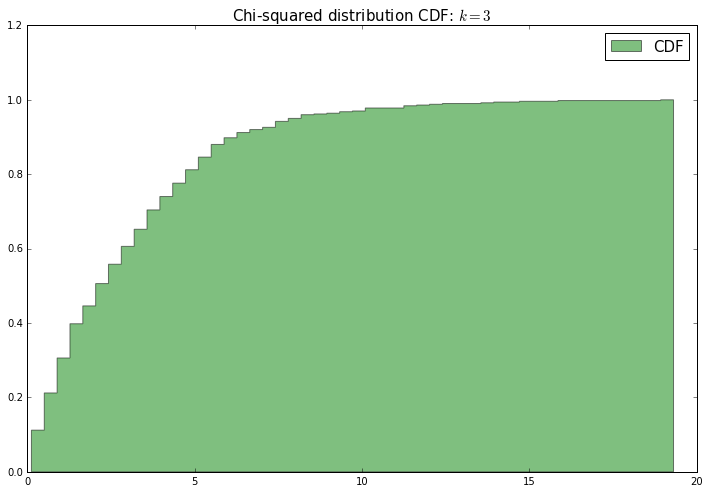

In [196]:
n, bins, patches = plt.hist(chisquared, 50, normed=1,
                            histtype='stepfilled', facecolor = 'green', alpha = 0.5, cumulative=True)
plt.title(r'Chi-squared distribution CDF: $k=3$', fontsize = 15)
green_patch2 = mpatches.Patch(facecolor='green',alpha = 0.5, label='CDF')
plt.legend(handles=[green_patch2], fontsize = 15)
fig_size[0] = 12
fig_size[1] = 8
plt.show()
fig_size[0] = 12
fig_size[1] = 8
plt.show()

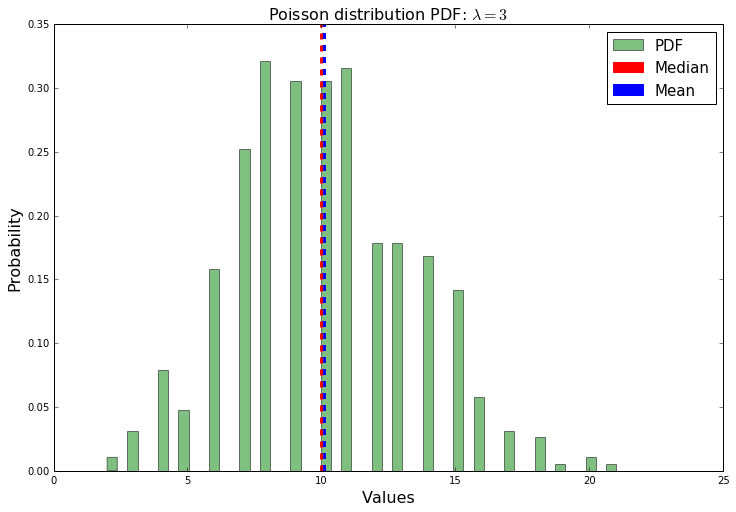

In [210]:
# PDF
n, bins, patches = plt.hist(poisson, num_bins, normed=1, facecolor='green', alpha=0.5)

plt.axvline(poisson.mean(), color='b', linestyle='dashed', linewidth=4) #среднее синего цвета
plt.axvline(np.median(poisson), color='r', linestyle='dashed', linewidth=3) #медиана красного цвета
plt.xlabel('Values', fontsize = 16)
plt.ylabel('Probability', fontsize = 16)
plt.title(r'Poisson distribution PDF: $\lambda=3$', fontsize = 16)

green_patch = mpatches.Patch(facecolor='green',alpha = 0.5, label='PDF')
blue_patch = mpatches.Patch(color='b', label='Mean')
red_patch = mpatches.Patch(color='r', label='Median')
plt.legend(handles=[green_patch, red_patch, blue_patch], fontsize = 15)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
plt.show()

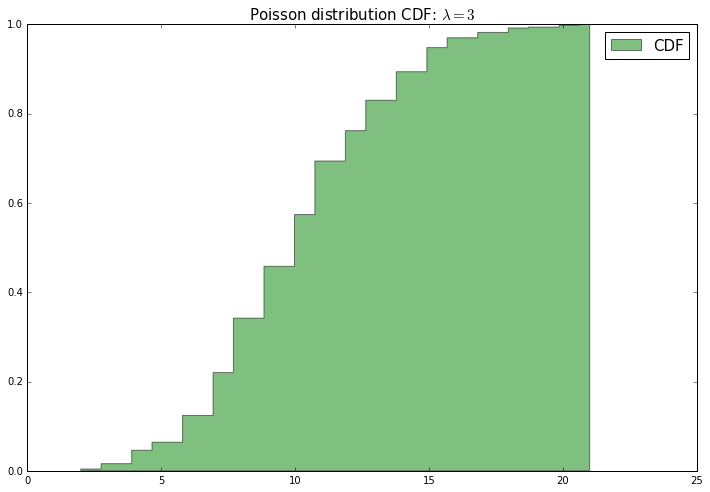

In [212]:
n, bins, patches = plt.hist(poisson, 50, normed=1,
                            histtype='stepfilled', facecolor = 'green', alpha = 0.5, cumulative=True)
plt.title(r'Poisson distribution CDF: $\lambda=3$', fontsize = 15)
green_patch2 = mpatches.Patch(facecolor='green',alpha = 0.5, label='CDF')
plt.legend(handles=[green_patch2], fontsize = 15)
fig_size[0] = 12
fig_size[1] = 8
plt.show()

**Задача 3.** Выведите описательные статистики распределений с помощью `scipy.stats.describe`. 

In [214]:
print(sp.stats.describe(normal), sp.stats.describe(chisquared), sp.stats.describe(poisson), sep = '\n')

DescribeResult(nobs=500, minmax=(-5.5728881518320614, 6.1918992810539102), mean=0.9022846572281733, variance=4.1055944045310993, skewness=-0.11566851898494418, kurtosis=0.04540324040668642)
DescribeResult(nobs=500, minmax=(0.12638047531401919, 19.304355152620214), mean=3.105988714405794, variance=7.5679134316578898, skewness=1.7668963933171007, kurtosis=4.67444703807265)
DescribeResult(nobs=500, minmax=(2, 21), mean=10.087999999999999, variance=11.018292585170341, skewness=0.2778696248527263, kurtosis=-0.07246667789038197)


## 2. Теория вероятностей. Корреляция и метод максимального правдоподобия

Корреляции с помощью ивестных вам пакетов можно посчитать несколькими способами: pandas.DataFrame.corr и numpy.correlate, numpy.corrcoef и scipy.stats.pearsonr для корреляционного коэффициента Пирсона, scipy.stats.spearmanr для корреляционного коэффициента Спирмена.

Объясните [разницу](http://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/supporting-topics/basics/a-comparison-of-the-pearson-and-spearman-correlation-methods/) между коэффициентами корреляции Спирмена и Пирсона.

По сути коэффициент Пирсона описывает степень линейной зависимости между переменными, причем переменные берутся из одной выборки (иначе говоря, они имеют одинаковое распределение). Коэффициент же Спирмена присваивает переменным ранги, описывая нелинейную зависимость, и может применяться для оценки переменных, имеющих разные распределения. 

В данных из файла [beauty.csv](https://www.dropbox.com/s/xio77e9p0oe1wqw/beauty.csv?dl=0) для каждого опрошенного имеется следующая информация: заработная плата за час работы, опыт работы, образование, внешняя привлекательность (в баллах от 1 до 5), бинарные признаки: пол, семейное положение, состояние здоровья (хорошее/плохое), членство в профсоюзе, цвет кожи (белый/чёрный), занятость в сфере обслуживания (да/нет).

**Задание 1.** Найдите 3 пары признаков с наибольшей корреляцией. Поясните на конктретных примерах, что означают полученные коэффициенты корреляции.

In [3]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix

beauty_df = pd.DataFrame.from_csv('../hse-tasks/data/beauty.csv', sep = ';')
beauty_df.reset_index(level=0, inplace=True)
beauty_df.head(5)


,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


Для рассчета корреляции воспользуемся коэффициентом Спирмена. Найдем топ-3 значения корреляции для двух случаев: в реальном выражении и по модулю. 

In [6]:
Corr = []
abscorr = []
Names = []
for i in beauty_df.columns.values:
    for k in beauty_df.columns.values:
        if i != k:
            Corr.append(sp.stats.spearmanr(beauty_df[i], beauty_df[k])[0])
            abscorr.append(abs(sp.stats.spearmanr(beauty_df[i], beauty_df[k])[0]))
            Names.append([i, k])

Топ-3 значения корреляции в реальном выражении.

In [7]:
correlation_data = pd.DataFrame([Names])
correlation_data = correlation_data.transpose()
correlation_data[1] = Corr
correlation_data.columns = ['Groups', 'Corr']
correlation_data = correlation_data.sort("Corr", ascending=False)
correlation_data.reset_index(level=0, inplace=True)
correlation_data = correlation_data.drop('index', 1)
correlation_data = correlation_data.groupby((correlation_data["Corr"] != correlation_data["Corr"].shift()).cumsum().values).first()
correlation_data.head(3)

,Groups,Corr
1,"[wage, exper]",0.360861
2,"[educ, service]",0.307787
3,"[married, exper]",0.285990


Топ-3 значения корреляции по модулю.

In [10]:
correlation_data = pd.DataFrame([Names])
correlation_data = correlation_data.transpose()
correlation_data[1] = abscorr
correlation_data[2] = Corr
correlation_data.columns = ['Groups', 'Abs Corr', 'Real Corr']
correlation_data = correlation_data.sort("Abs Corr", ascending=False)
correlation_data.reset_index(level=0, inplace=True)
correlation_data = correlation_data.drop('index', 1)
correlation_data = correlation_data.groupby((correlation_data["Abs Corr"] != correlation_data["Abs Corr"].shift()).cumsum().values).first()
correlation_data.head(3)

,Groups,Abs Corr,Real Corr
1,"[female, wage]",0.448844,-0.448844
2,"[exper, wage]",0.360861,0.360861
3,"[married, female]",0.319228,-0.319228


Поясним топ-3 значения:
1) Видно, что женщины и зарплата коррелируют отрицательно. Отсюда можно сделать вывод, что у мужчин заработная плата, как правило, выше. 
2) Люди, которые имеют более большой опыт работы, получают большую зарплату. 
3) В данной выборке женатых мужчин больше чем замужних женщин. Возможно, это объясняется тем, что женщин в популяции, из который взята выборка, просто-напросто больше, поэтому им не удалось найти пару. 

**Задание 2.** На семинаре мы рассмотрели различные распрелеления случайных величин (дискретные и непрерывные). 

Изобразите гистограммы каждого из признаков.<br/>
Определите возможный закон распределения каждого из них и оцените его параметры. Если готовой функции в scipy.stats для распределения нет, то оцените эти параметры сами по методу максимального правдоподобия.

В данном случае красным выделено реальное распределение, а зеленым теоретичекое. Параметры выводятся под графиком.

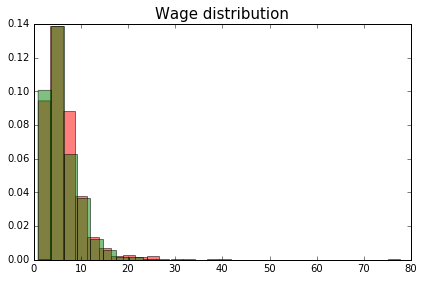

Shape parameter = 0.608433 loc = 0.102805 scale = 5.129967


In [485]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(1, 1, 1)
ax1.hist(beauty_df['wage'], facecolor = 'red', bins = 30, alpha = 0.5, normed = True)
x, y, z = stats.lognorm.fit(beauty_df['wage']) 
ax1.hist(stats.lognorm.rvs(x, y, z, size=500), normed = True, alpha = 0.5) 
ax1.set_title(r'Wage distribution', fontsize = 15)

plt.tight_layout()
plt.show()
print('Shape parameter = %f' % x, 'loc = %f' % y,'scale = %f' % z)

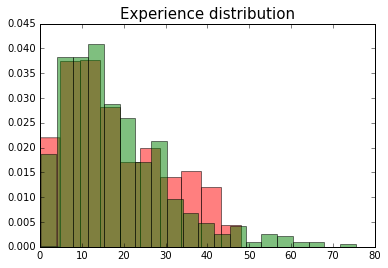

Degree of freedom = 4.154154 loc = -0.494924 scale = 4.501824


In [488]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(1, 1, 1)
n, bins, patches = ax2.hist(beauty_df['exper'], facecolor = 'red', alpha = 0.5, normed = True)
x, y, z = stats.chi2.fit(beauty_df['exper']) 
ax2.hist(stats.chi2.rvs(x, y, z, size=500), normed = True, alpha = 0.5, bins = 20) 
ax2.set_title(r'Experience distribution', fontsize = 15)
plt.show()
print('Degree of freedom = %f' % x, 'loc = %f' % y,'scale = %f' % z)

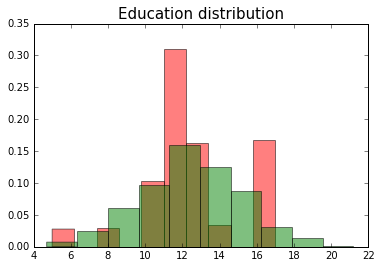

mean 12.5634920635 std 2.62344748268


In [483]:
fig3 = plt.figure()
ax3 = fig3.add_subplot(1, 1, 1)
n, bins, patches = ax3.hist(beauty_df['educ'], facecolor = 'red', normed = True, alpha = 0.5)
ax3.set_title(r'Education distribution', fontsize = 15)

x, y = stats.norm.fit(beauty_df['educ']) 
ax3.hist(stats.norm.rvs(x, y, size=500), normed = True, bins = 10, alpha = 0.5) 
plt.show()
print('mean', x, 'std', y)

Далее, сначала будет выводиться гистограмма, затем теоретическое распределение. Параметры под графиком.

probability 1 0.0103174603175 probability 2 0.112698412698 probability 3 0.573015873016 probability 4 0.288888888889 probability 5 0.0150793650794


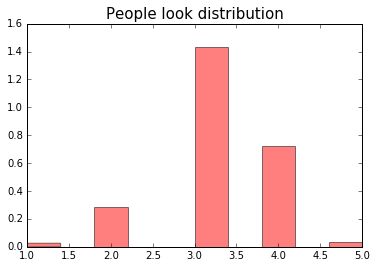

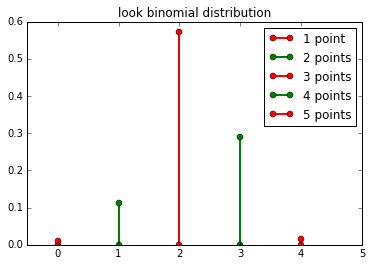

In [486]:
fig4 = plt.figure()
ax4 = fig4.add_subplot(1, 1, 1)
n, bins, patches = ax4.hist(beauty_df['looks'], facecolor = 'red', normed =True, alpha = 0.5)
ax4.set_title(r'People look distribution', fontsize = 15)
p = beauty_df['looks'].mean()/5 
looks = beauty_df.groupby(['looks']).size()
p1 = looks.ix[1]/len(beauty_df['married'])
p2 = looks.ix[2]/len(beauty_df['married'])
p3 = looks.ix[3]/len(beauty_df['married'])
p4 = looks.ix[4]/len(beauty_df['married'])
p5 = looks.ix[5]/len(beauty_df['married'])

fig15 = plt.figure()
ax15 = fig15.add_subplot(1, 1, 1)
ax15.set_xlim(-0.5, 5)
ax15.plot((0, 0), (0, p1), 'o-r', linewidth=2.0, label = '1 point')
ax15.plot((1, 1), (0, p2), 'o-g', linewidth=2.0, label = '2 points')
ax15.plot((2, 2), (0, p3), 'o-r', linewidth=2.0, label = '3 points')
ax15.plot((3, 3), (0, p4), 'o-g', linewidth=2.0, label = '4 points')
ax15.plot((4, 4), (0, p5), 'o-r', linewidth=2.0, label = '5 points')
ax15.set_title('look binomial distribution')
ax15.legend() 
print ('probability-1', p1,'probability-2', p2,'probability-3', p3,'probability-4', p4,'probability-5', p5)

probability 0.07380952380952381


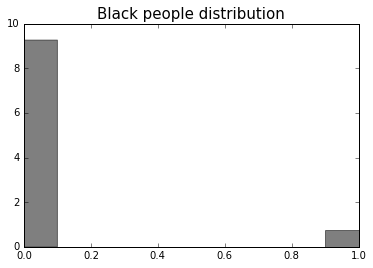

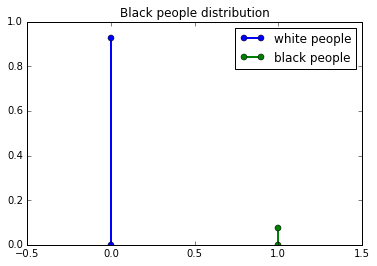

In [487]:
fig5 = plt.figure()
ax5 = fig5.add_subplot(1, 1, 1)
n, bins, patches = ax5.hist(beauty_df['black'], facecolor = 'black', normed = True, alpha = 0.5)
ax5.set_title(r'Black people distribution', fontsize = 15)

fig6 = plt.figure()
ax6 = fig6.add_subplot(1, 1, 1)
p = beauty_df['black'].sum()/len(beauty_df['black'])
q = 1 - p
ax6.plot((0, 0), (0, q), 'o-', linewidth=2.0, label = 'white people')
ax6.plot((1, 1), (0, p), 'o-g', linewidth=2.0, label = 'black people')
ax6.set_xlim(-0.5, 1.5)
ax6.set_title('Black people distribution')
ax6.legend() 

print('probability',p)

probability 0.346031746031746


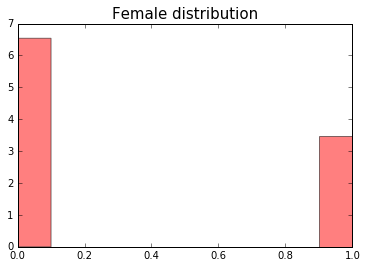

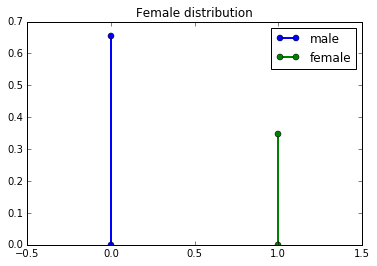

In [493]:
fig6 = plt.figure()
ax6 = fig6.add_subplot(1, 1, 1)
n, bins, patches = ax6.hist(beauty_df['female'], facecolor = 'red', normed = True, alpha = 0.5)
ax6.set_title(r'Female distribution', fontsize = 15)

fig7 = plt.figure()
ax7 = fig7.add_subplot(1, 1, 1)
p = beauty_df['female'].sum()/len(beauty_df['female'])
q = 1 - p
ax7.plot((0, 0), (0, q), 'o-', linewidth=2.0, label = 'male')
ax7.plot((1, 1), (0, p), 'o-g', linewidth=2.0, label = 'female')
ax7.set_xlim(-0.5, 1.5)
ax7.set_title('Female distribution')
ax7.legend() 

print('probability',p)

probability 0.6912698412698413


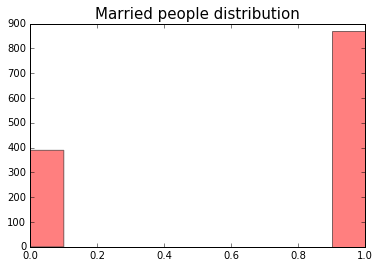

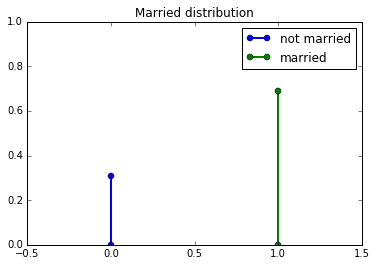

In [492]:
fig7 = plt.figure()
ax7 = fig7.add_subplot(1, 1, 1)
n, bins, patches = ax7.hist(beauty_df['married'], facecolor = 'red', alpha = 0.5)
ax7.set_title(r'Married people distribution', fontsize = 15)

fig8 = plt.figure()
ax8 = fig8.add_subplot(1, 1, 1)
p = beauty_df['married'].sum()/len(beauty_df['married'])
q = 1 - p
ax8.plot((0, 0), (0, q), 'o-', linewidth=2.0, label = 'not married')
ax8.plot((1, 1), (0, p), 'o-g', linewidth=2.0, label = 'married')
ax8.set_xlim(-0.5, 1.5)
ax8.set_ylim(0, 1)
ax8.set_title('Married distribution')
ax8.legend() 

print('probability',p)

probability 0.27380952380952384


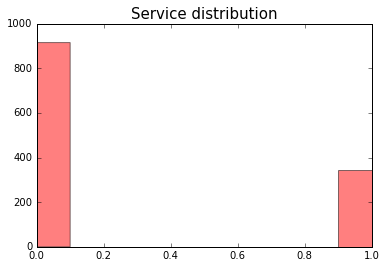

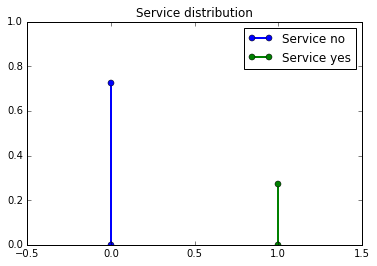

In [491]:
fig9 = plt.figure()
ax9 = fig9.add_subplot(1, 1, 1)
n, bins, patches = ax9.hist(beauty_df['service'], facecolor = 'red', alpha = 0.5)
ax9.set_title(r'Service distribution', fontsize = 15)

fig10 = plt.figure()
ax10 = fig10.add_subplot(1, 1, 1)
p = beauty_df['service'].sum()/len(beauty_df['service'])
q = 1 - p
ax10.plot((0, 0), (0, q), 'o-', linewidth=2.0, label = 'Service no')
ax10.plot((1, 1), (0, p), 'o-g', linewidth=2.0, label = 'Service yes')
ax10.set_xlim(-0.5, 1.5)
ax10.set_ylim(0, 1)
ax10.set_title('Service distribution')
ax10.legend() 

print('probability',p)

probability 0.2722222222222222


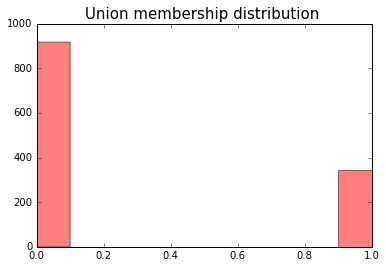

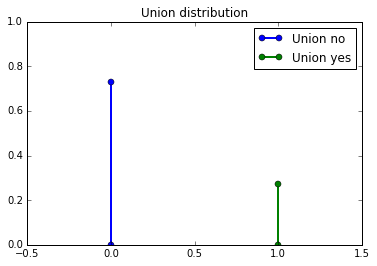

In [490]:
fig12 = plt.figure()
ax12 = fig12.add_subplot(1, 1, 1)
n, bins, patches = ax12.hist(beauty_df['union'], facecolor = 'red', alpha = 0.5)
ax12.set_title(r'Union membership distribution ', fontsize = 15)

fig13 = plt.figure()
ax13 = fig13.add_subplot(1, 1, 1)
p = beauty_df['union'].sum()/len(beauty_df['union'])
q = 1 - p
ax13.plot((0, 0), (0, q), 'o-', linewidth=2.0, label = 'Union no')
ax13.plot((1, 1), (0, p), 'o-g', linewidth=2.0, label = 'Union yes')
ax13.set_xlim(-0.5, 1.5)
ax13.set_ylim(0, 1)
ax13.set_title('Union distribution')
ax13.legend() 

print('probability',p)

probability 0.9333333333333333


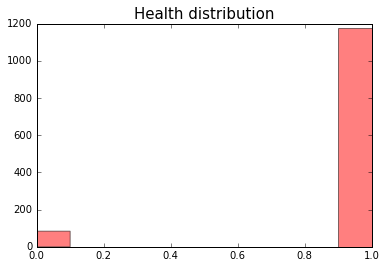

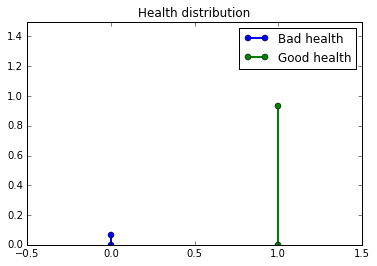

In [489]:
fig14 = plt.figure()
ax14 = fig14.add_subplot(1, 1, 1)
n, bins, patches = ax14.hist(beauty_df['goodhlth'], facecolor = 'red', alpha = 0.5)
ax14.set_title(r'Health distribution', fontsize = 15)

fig14 = plt.figure()
ax14 = fig14.add_subplot(1, 1, 1)
p = beauty_df['goodhlth'].sum()/len(beauty_df['goodhlth'])
q = 1 - p
ax14.plot((0, 0), (0, q), 'o-', linewidth=2.0, label = 'Bad health')
ax14.plot((1, 1), (0, p), 'o-g', linewidth=2.0, label = 'Good health')
ax14.set_xlim(-0.5, 1.5)
ax14.set_ylim(0, 1.5)
ax14.set_title('Health distribution')
ax14.legend() 

print('probability',p)

## 3. Метод наивного Байеса

Пояснения по выполнению этого задания будут рассказаны на семинаре 1 марта

Обучение методом наивного Байеса основывается на достаточно сильном предположении, что все признаки попарно независимы. По формуле Байеса $$P(y|x_1,\dots,x_n)=\frac{P(y)P(x_1,\dots,x_n|y)}{P(x_1,\dots,x_n)}.$$ В предположении, что признаки независимы получаем, что $$P(y|x_1,\dots,x_n)=\frac{P(y)\prod_{i=1}^n P(x_i|y)}{P(x_1,\dots,x_n)}$$
Т.к. $$P(x_1,\dots,x_n)$$ задается условиями задачи, принцип максимального правдоподобия для наивного Байеса запишется следующим образом: $$\hat y = \arg\max_y P(y)\prod_{i=1}^n P(x_i|y).$$


Библиотека `sklearn` поддерживает несколько реализаций наивного Байеса: `sklearn.naive_bayes.GaussianNB`, `sklearn.naive_bayes.MultinomialNB` и др.

In [11]:
from sklearn.cross_validation import train_test_split
from sklearn.datasets import fetch_20newsgroups
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

**Задание 1.** Выберите 2 категории новостных сообщений из `20newsgroups`. Случайным образом, в пропорции 70/30, разделите наборы текстов на обучающую и контрольную выборки. В результате выполнения данного задания у вас должно получится 5 переменных: `text_all`, `text_train`, `text_test`, `y_train`, `y_test`.

In [12]:
# Список новостных заголовков
['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [13]:
categories = ['sci.electronics', 'talk.politics.guns'] 
two_all = fetch_20newsgroups(subset='all', categories=categories)

In [14]:
two_all.target_names

['sci.electronics', 'talk.politics.guns']

In [15]:
print(len(two_all.data), len(two_all.target), type(two_all.data))
two_all.data

1894 1894 <class 'list'>


["From: rainer@spot.Colorado.EDU (Rainer Malzbender)\nSubject: Re: HC11 blues -> no can find\nNntp-Posting-Host: spot.colorado.edu\nOrganization: University of Colorado, Boulder\nLines: 10\n\nIn article <pat.734048757@fegmania.wustl.edu> pat@fegmania (Patrick Niemeyer) writes:\n>I too had trouble finding hc11's when I looked for them a while back.\n>I'd be interesting in hearing if anyone knows about their availability now...\n\nThe newest JDR Microdevices catalog has at least one variant of the HC11.\n\n-- \nRainer M. Malzbender\nFyzzicks, CU Boulder\n(303)492-1366             \n",
 "From: billq@ms.uky.edu (Billy Quinn)\nSubject: Suggestions  on Audio relays ???\nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 22\n\nI built a little project using the radio shack 5vdc relays to switch\naudio.  I got pretty bad 'clicks' when the thing switched.  I was doing\nmost of the common things one is supposed to do when using relays and\nnothing seemed to get rid of the click

In [16]:
text_all = two_all.data 
text_train, text_test, y_train, y_test = train_test_split(two_all.data, two_all.target, test_size = 0.3)

In [17]:
print(len(text_train), type(text_train))

1325 <class 'list'>


**Задание 2.** На переменной `text` постройте конвертер из текстов в частотную матрицу с помощью метода `CountVectorizer(analyzer='word', stop_words='english', lowercase=True)`, а затем используйте его на выборках `train` и `test`. В результате вы должны получить 2 матрицы: `X_train` и `X_test`.

In [23]:
count_vec = CountVectorizer(analyzer='word', stop_words='english', lowercase=True) 
count_vec.fit(text_all) 
X_train = count_vec.transform(text_train).toarray()
X_test = count_vec.transform(text_test).toarray()

In [19]:
print(X_train)
print('количество строчек', len(X_train))

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
количество строчек 1325


In [55]:
print(X_test)
print('количество строчек', len(X_test))

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
количество строчек 569


**Задание 3.** По матрице `X_train` найдите 50 самых частотных слов. Соответствия столбцов и слов можно понять по методу `CountVectorizer.get_feature_names()`.

In [70]:
X_train.shape

(1325, 29462)

In [85]:
X_train_sum = np.sum(X_train, axis = 0)
data = pd.DataFrame(X_train_sum)
data[1] = pd.DataFrame(count_vec.get_feature_names())
data.columns = ['Count', 'Word']
data.sort('Count', ascending=False).head(50)

,Count,Word
10926,2623,edu
8200,1687,com
25535,1454,subject
16959,1418,lines
19992,1316,organization
28903,1042,writes
5374,972,article
13571,964,gun
20588,853,people
10472,771,don


**Задание 4.** Обучите наивный байесовский классификатор MultinomialNB с параметром слгаживания `alpha=1` на выборке train. Примените его к данным из тестовой выборке и оцените точность совпадения меток.

In [81]:
clf = MultinomialNB(alpha=1.0).fit(X_train, y_train) 
predicted = clf.predict(X_test) 
probabilities = clf.predict_proba(X_test)

In [82]:
print('Оценки вероятностей = ', probabilities)

Ожидаемые вероятности =  [[  3.83452079e-065   1.00000000e+000]
 [  1.00000000e+000   8.45700132e-015]
 [  8.56382708e-035   1.00000000e+000]
 ..., 
 [  1.58899138e-017   1.00000000e+000]
 [  7.89764006e-125   1.00000000e+000]
 [  1.00000000e+000   1.95026431e-048]]


In [87]:
from sklearn import metrics 
print(metrics.classification_report(y_test, predicted, target_names=two_all.target_names))

                    precision    recall  f1-score   support

   sci.electronics       0.99      1.00      1.00       308
talk.politics.guns       1.00      0.99      0.99       261

       avg / total       0.99      0.99      0.99       569



**Задание 5.** Обучите наивный байесовский классификатор MultinomialNB с параметром слгаживания `alpha=0` на выборке train. Примените его к данным из тестовой выборки и оцените точность совпадения меток. Поменяются ли результаты? Объясните почему?

Учитывайте не только метки, но и вероятности, которые выдает классификатор

In [24]:
clf_2 = MultinomialNB(alpha=0.0).fit(X_train, y_train) 
predicted_2 = clf_2.predict(X_test) 
probabilities_2 = clf_2.predict_proba(X_test)
print('Оценки вероятностей = ', probabilities_2)

Оценки вероятностей =  [[ nan  nan]
 [ nan  nan]
 [ nan  nan]
 ..., 
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]]


In [100]:
print(metrics.classification_report(y_test, predicted_2, target_names=two_all.target_names))

                    precision    recall  f1-score   support

   sci.electronics       0.54      1.00      0.70       308
talk.politics.guns       0.00      0.00      0.00       261

       avg / total       0.29      0.54      0.38       569



Видно, что получившиеся результаты отличаются от того, что удалось получить в прошлом пункте данной задачи. Это связано с тем, что во втором пункте поменялся параметр сглаживания. Оценки вероятностей ближе к оценкам максимального правдоподобия. 